In [1]:
import pandas as pd
from finta import TA
import numpy as np

In [2]:
#yahoo finance stock data (for longer timeframe)
import yfinance as yf

def stock_df(ticker, start, end):
    stock = yf.Ticker(ticker)
    stock_df = stock.history(start = start, end = end)
    return stock_df

start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('today')
                     
spy_df = stock_df('SPY', start, end)

len(spy_df)

1768

In [3]:
# spy_df["Monetary Gain"] = spy_df["Close"].diff()
spy_df['Actual Return'] = spy_df["Close"].pct_change()

spy_df.loc[(spy_df['Actual Return'] >= 0), 'Profit/Loss'] = 1
spy_df.loc[(spy_df['Actual Return'] < 0), 'Profit/Loss'] = -1

# spy_df['Trades'] = np.abs(spy_df['Trading Signal'].diff())

# spy_df['Strategy Returns'] = spy_df['Actual Return'] * spy_df['Trading Signal'].shift()

spy_df.dropna(inplace= True)

spy_df.head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Return,Profit/Loss
Date,,,,,,,,,
2015-01-05,179.236524,179.412097,176.760913,177.085724,169632600,0.0,0,-0.018060,-1.0
2015-01-06,177.410577,177.963645,174.575031,175.417801,209151400,0.0,0,-0.009419,-1.0
2015-01-07,176.822387,177.963632,176.348338,177.603699,125346700,0.0,0,0.012461,1.0
2015-01-08,179.096059,180.983506,179.078511,180.755249,147217800,0.0,0,0.017745,1.0
2015-01-09,181.194228,181.211789,178.657158,179.306793,158567300,0.0,0,-0.008013,-1.0
2015-01-12,179.447205,179.614004,177.261282,177.902130,144396100,0.0,0,-0.007834,-1.0
2015-01-13,179.192631,180.386547,176.023488,177.401764,214553300,0.0,0,-0.002813,-1.0
2015-01-14,175.268480,176.541415,174.320383,176.330719,192991100,0.0,0,-0.006037,-1.0
2015-01-15,177.006703,177.340288,174.592536,174.715439,176613900,0.0,0,-0.009161,-1.0


In [4]:
spy_momentum = pd.DataFrame()
spy_momentum_changes = pd.DataFrame()
spy_momentum_changes_lag = pd.DataFrame()

spy_trend = pd.DataFrame()
spy_trend_changes = pd.DataFrame()

spy_volatility = pd.DataFrame()
spy_volatility_changes = pd.DataFrame()

In [5]:
#time period should change depending on timeframe of stock data

spy_momentum["RSI"] = TA.RSI(spy_df, 14)
spy_momentum["CCI"] = TA.CCI(spy_df, 14)
spy_momentum["ROC"] = TA.ROC(spy_df)
spy_momentum["STO"] = TA.STOCH(spy_df)
spy_momentum.dropna(inplace = True)
spy_momentum["Closes Up/Down"] = spy_df["Actual Return"]
spy_momentum

,RSI,CCI,ROC,STO,Closes Up/Down
Date,,,,,
2015-01-23,59.273475,119.925288,2.577299,81.575424,-0.005483
2015-01-26,60.646492,87.283964,1.552051,87.674117,0.002342
2015-01-27,50.329495,-2.143030,-1.534707,53.240375,-0.013190
2015-01-28,42.805579,-60.735358,-2.012246,20.203761,-0.012824
2015-01-29,48.683934,-70.027249,-0.325663,43.710476,0.009243
...,...,...,...,...,...
2022-01-03,61.105538,74.890025,1.867468,95.369673,0.005790
2022-01-04,60.893112,76.400896,2.739358,91.574121,-0.000335
2022-01-05,50.135922,11.190858,1.850525,59.778060,-0.019202


In [6]:
spy_momentum_changes["RSI Diff"] = spy_momentum["RSI"].diff()
spy_momentum_changes["CCI Diff"] = spy_momentum["CCI"].diff()
spy_momentum_changes["ROC Diff"] = spy_momentum["ROC"].diff()
spy_momentum_changes["STO Diff"] = spy_momentum["STO"].diff()
spy_momentum_changes.dropna(inplace = True)
spy_momentum_changes["Daily Return"] = spy_df["Actual Return"]
display(spy_momentum_changes)

#Using the previous day's changes in momentum indicator to predict the pct change of the current day

spy_momentum_changes_lag["Lag RSI Diff"] = spy_momentum["RSI"].diff().shift()
spy_momentum_changes_lag["Lag CCI Diff"] = spy_momentum["CCI"].diff().shift()
spy_momentum_changes_lag["Lag ROC Diff"] = spy_momentum["ROC"].diff().shift()
spy_momentum_changes_lag["Lag STO Diff"] = spy_momentum["STO"].diff().shift()
spy_momentum_changes_lag.dropna(inplace = True)
spy_momentum_changes_lag["Daily Return"] = spy_df["Actual Return"]
spy_momentum_changes_lag

,RSI Diff,CCI Diff,ROC Diff,STO Diff,Daily Return
Date,,,,,
2015-01-26,1.373017,-32.641324,-1.025248,6.098693,0.002342
2015-01-27,-10.316997,-89.426994,-3.086758,-34.433743,-0.013190
2015-01-28,-7.523917,-58.592328,-0.477539,-33.036613,-0.012824
2015-01-29,5.878356,-9.291891,1.686583,23.506715,0.009243
2015-01-30,-6.422420,-18.056321,-0.975803,-32.037093,-0.012575
...,...,...,...,...,...
2022-01-03,2.293101,-2.834605,-0.996105,9.870788,0.005790
2022-01-04,-0.212426,1.510871,0.871890,-3.795552,-0.000335
2022-01-05,-10.757190,-65.210038,-0.888833,-31.796061,-0.019202


,Lag RSI Diff,Lag CCI Diff,Lag ROC Diff,Lag STO Diff,Daily Return
Date,,,,,
2015-01-27,1.373017,-32.641324,-1.025248,6.098693,-0.013190
2015-01-28,-10.316997,-89.426994,-3.086758,-34.433743,-0.012824
2015-01-29,-7.523917,-58.592328,-0.477539,-33.036613,0.009243
2015-01-30,5.878356,-9.291891,1.686583,23.506715,-0.012575
2015-02-02,-6.422420,-18.056321,-0.975803,-32.037093,0.012384
...,...,...,...,...,...
2022-01-03,-1.439374,-32.335915,0.449605,-4.307297,0.005790
2022-01-04,2.293101,-2.834605,-0.996105,9.870788,-0.000335
2022-01-05,-0.212426,1.510871,0.871890,-3.795552,-0.019202


In [21]:
#try clustering/pca to see if there is a correlation between the indicators and the daily return
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import hvplot.pandas

smcl_copy = spy_momentum_changes_lag.copy()
smcl_copy.loc[(smcl_copy["Daily Return"] >= 0), 'Profit/Loss'] = 1
smcl_copy.loc[(smcl_copy["Daily Return"] < 0), 'Profit/Loss'] = -1
smcl_copy = smcl_copy.drop(columns = ["Daily Return"])

pca = PCA(n_components=2)
smcl_copy_pca = pca.fit_transform(smcl_copy)
pca.explained_variance_ratio_

array([0.97219292, 0.02621665])

In [28]:
pca_df = pd.DataFrame( smcl_copy_pca, columns=["PCA1", "PCA2"])

inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

# elbow_data = {"k": k, "inertia": inertia}
# df_elbow = pd.DataFrame(elbow_data)

# df_elbow.hvplot.line(
#     x="k", 
#     y="inertia", 
#     title="Elbow Curve", 
#     xticks=k
# )

pca_model = KMeans(n_clusters=2, random_state=0)
pca_model.fit(pca_df)
k_3 = pca_model.predict(pca_df)

pca_df["Profit/Loss"] = k_3

pca_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="Profit/Loss"
)

C:\Users\ahe04\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  f"KMeans is known to have a memory leak on Windows "


:NdOverlay   [Profit/Loss]
   :Scatter   [PCA1]   (PCA2)

In [34]:
column_names = list(smcl_copy.columns[1:-1])
display(column_names)

smcl_copy.hvplot.scatter(
    x="Lag RSI Diff",
    y=column_names,
    subplots=True,
    color="Profit/Loss",
    cmap="plasma"
).cols(1)

['Lag CCI Diff', 'Lag ROC Diff', 'Lag STO Diff']

:NdLayout   [Variable]
   :Scatter   [Lag RSI Diff]   (value,Profit/Loss)

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = spy_momentum_changes_lag.drop(columns = ["Daily Return"])
y = spy_momentum_changes_lag["Daily Return"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [9]:
neural = Sequential()

number_input_features = 4
hidden_nodes_layer1 =  (number_input_features + 1) // 2 
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

neural.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="elu"))
neural.add(Dense(units=hidden_nodes_layer2, activation="elu"))
neural.add(Dense(units=1, activation="linear"))

neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [10]:
neural.compile(loss = "mean_squared_error", optimizer = "adam",  metrics = ["mse"])

model = neural.fit(X_train_scaled, y_train, epochs = 200)

Epoch 1/200
42/42 [==============================] - 0s 842us/step - loss: 2.9430e-04 - mse: 2.9430e-04
Epoch 2/200
42/42 [==============================] - 0s 749us/step - loss: 1.5864e-04 - mse: 1.5864e-04
Epoch 3/200
42/42 [==============================] - 0s 736us/step - loss: 1.3632e-04 - mse: 1.3632e-04
Epoch 4/200
42/42 [==============================] - 0s 733us/step - loss: 1.2865e-04 - mse: 1.2865e-04
Epoch 5/200
42/42 [==============================] - 0s 738us/step - loss: 1.2772e-04 - mse: 1.2772e-04
Epoch 6/200
42/42 [==============================] - 0s 759us/step - loss: 1.2490e-04 - mse: 1.2490e-04
Epoch 7/200
42/42 [==============================] - 0s 739us/step - loss: 1.2462e-04 - mse: 1.2462e-04
Epoch 8/200
42/42 [==============================] - 0s 735us/step - loss: 1.2442e-04 - mse: 1.2442e-04
Epoch 9/200
42/42 [==============================] - 0s 793us/step - loss: 1.2346e-04 - mse: 1.2346e-04
Epoch 10/200
42/42 [==============================] - 0s 791us/s

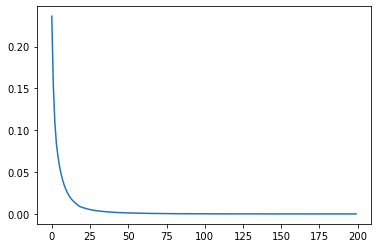

In [25]:
import matplotlib.pyplot as plt

plt.plot(model.history["loss"])

In [14]:
Y_prediction = neural.predict(X_train_scaled)
# Y_prediction = Y_prediction.squeeze()
display(Y_prediction)

# results = pd.DataFrame( {"Predictions": Y_prediction, "Actual": y_train})
# results

y_train.mean()

array([[0.00226367],
       [0.00226367],
       [0.00226367],
       ...,
       [0.00226367],
       [0.00226367],
       [0.00226367]], dtype=float32)

0.0005909413579282914